<a href="https://colab.research.google.com/github/erickaleed/fuzzy-pancake/blob/main/DeMariaCSC161_N850MyModule1BuildingNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

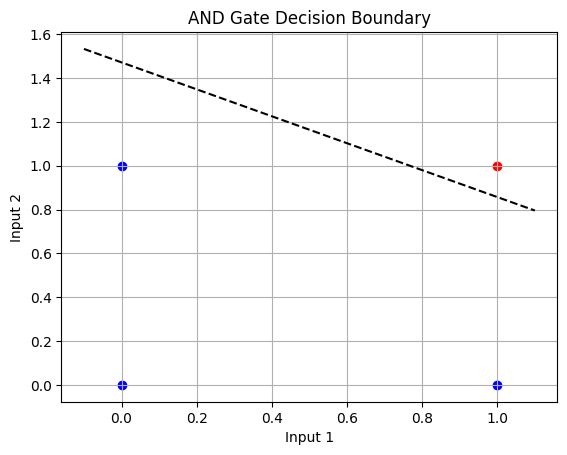

Epoch 0, Loss: 0.3627
Epoch 1000, Loss: 0.1066
Epoch 2000, Loss: 0.0037
Epoch 3000, Loss: 0.0016
Epoch 4000, Loss: 0.0010
Epoch 5000, Loss: 0.0007
Epoch 6000, Loss: 0.0006
Epoch 7000, Loss: 0.0005
Epoch 8000, Loss: 0.0004
Epoch 9000, Loss: 0.0003
Final Predictions:
Input: [0 0], Predicted: [0.02], Expected: 0
Input: [0 1], Predicted: [0.98], Expected: 1
Input: [1 0], Predicted: [0.98], Expected: 1
Input: [1 1], Predicted: [0.02], Expected: 0


In [2]:
# Neural Network Foundations: From Perceptron to XOR
# Author: Ericka-Lee DeMaria
# Date: August 30, 2025
# Course: CSC161-N850 Deep Learning
#  Instructor: Dr. Carl Arrington
#  Objective:
  # To implement and document a best-practice neural network assignment that honors both historical context and ethical clarity. This includes:
  # Building a single-layer perceptron for the AND gate
  # Constructing a multi-layer neural network for the XOR gate
  # Applying forward and backward propagation with proper activation and loss functions
  # Visualizing decision boundaries and loss convergence




#  Section 1: Imports and Setup

import numpy as np
import matplotlib.pyplot as plt

#  Best Practice: Keep imports minimal and purposeful

# Section 2: Perceptron for AND Gate

# Dataset

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

# Initialization

weights = np.random.rand(2)
bias = np.random.rand(1)
lr = 0.1
epochs = 20


# Activation Function

def step(x):
    return 1 if x >= 0 else 0

# Training Loop

for epoch in range(epochs):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        prediction = step(linear_output)
        error = y[i] - prediction
        weights += lr * error * X[i]
        bias += lr * error

# Decision Boundary Visualization

plt.figure()
for i in range(len(X)):
    color = 'blue' if y[i] == 0 else 'red'
    plt.scatter(X[i][0], X[i][1], color=color)

x_vals = np.linspace(-0.1, 1.1, 100)
boundary = -(weights[0]*x_vals + bias)/weights[1]
plt.plot(x_vals, boundary, '--k')
plt.title("AND Gate Decision Boundary")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()

# Section 3: Multi-Layer Network for XOR Gate

# Dataset

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Initialization

input_dim = 2
hidden_dim = 2
output_dim = 1

lr = 0.5
epochs = 10000

weights_input_hidden = np.random.rand(input_dim, hidden_dim)
bias_hidden = np.random.rand(1, hidden_dim)
weights_hidden_output = np.random.rand(hidden_dim, output_dim)
bias_output = np.random.rand(1, output_dim)

# Activation Functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training Loop


for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Loss
    error = y - final_output
    loss = np.mean(error**2)

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    d_hidden = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_output)

    # Weight updates
    weights_hidden_output += hidden_output.T.dot(d_output) * lr
    bias_output += np.sum(d_output, axis=0, keepdims=True) * lr

    weights_input_hidden += X.T.dot(d_hidden) * lr
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * lr

    # Optional logging
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Section 4: Final Testing

print("Final Predictions:")
for i in range(len(X)):
    hidden = sigmoid(np.dot(X[i], weights_input_hidden) + bias_hidden)
    output = sigmoid(np.dot(hidden, weights_hidden_output) + bias_output)
    print(f"Input: {X[i]}, Predicted: {np.round(output[0], 2)}, Expected: {y[i][0]}")

